In this tutorial we will learn data exploration and will build a predictive model using Linear Regression Algorithm. Courtesy: http://theenglishtea.company/linear-regression-for-impatient-programmer/

In [297]:
import numpy as np
#import scipy as scp
from scipy import stats
import matplotlib.pyplot as plt
import math

Load the data, that has two columns of float numbers say x and y. We will first arrange data in a list of lists, such as data = [[x1,y1,], [x2,y2], ... [xN,yN]].

In [298]:
datafile = open("/Users/skhalil/Desktop/Analysis/DataScience/Regression/LinearData.txt",'r')
datafile.readline()
data = [ [float(word) for word in line.split()] for line in datafile.readlines()]
# print first three lines
print (data[0:3])
# total data entries
n = float (len (data))
print('Total data entries', n)
# Close the data file.
datafile.close()

[[6.4063, 45.8259], [1.3291, 14.6734], [11.793, 43.5116]]
Total data entries 999.0


Lets also split the data pairs into lists of x and y, such as x = [x1, x2, .., xN], y = [y1, y2, ..., yN]

In [299]:
dataX = [XY[0] for XY in data]
dataY = [XY[1] for XY in data]
#n = float(len (dataX))
#dataX = [1, 2, 3, 4, 5, 6, 7]
#dataY = [2, 7, 8, 13, 14, 20, 19]

print(dataX[0], dataY[0])

6.4063 45.8259


Lets visualize the data first. Its a good idea to write a plotting function for reusability and asthetics.

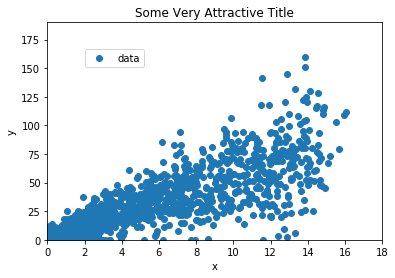

In [300]:
def scatterPlot(dataX,dataY):
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.scatter(dataX, dataY,label='data')
        plt.title('Some Very Attractive Title')
        plt.xlabel('x')
        plt.ylabel('y')
        axes = plt.gca()
        axes.set_xlim([0,18])
        axes.set_ylim([0,190])
        ax.legend(loc='upper center', bbox_to_anchor=(0.2, 0.9), shadow=False, ncol=2)
        fig.patch.set_facecolor('white') #sets the color of the border
        plt.show()
scatterPlot(dataX,dataY)        

Lets explore basic properties, such as mean, variance, standard deviation

Mean: \begin{equation*}\bar{x} = \frac{\sum{x}}{n}; \bar{y} = \frac{\sum{y}}{n} \end{equation*}

Unbiased Variance: \begin{equation*} s_{x} = \frac{\sum{(x-\bar{x})}^2}{(n-1)};  s_{y} = \frac{\sum{(y-\bar{y})}^2}{(n-1)}\end{equation*}

Standard deviation: \begin{equation*} \sigma_x = \sqrt s_{x}; \sigma_y = \sqrt s_{y} \end{equation*}

Covariance: \begin{equation*} Cov(x,y) = \frac{\sum[(x-\bar{x})(y-\bar{y})]}{(n-1)}\end{equation*}

Correlation: \begin{equation*}  \frac{Cov(x,y)}{\sigma_x  \sigma_y} \end{equation*}


In [301]:
#average
xbar = sum(dataX)/n
ybar = sum(dataY)/n

print("Average X: ", round(xbar,3)," Average Y: ", round(ybar,3))

Average X:  6.655  Average Y:  38.072


In [302]:
# variance, sd, covaraince
varianceX = sum([pow(x-xbar,2) for x in dataX])/(n-1)
varianceY = sum([pow(y-ybar,2) for y in dataY])/(n-1)
stdevX = math.sqrt(varianceX)
stdevY = math.sqrt(varianceY)
print("x variance:", round(varianceX,3), "  x standard deviation:", round(stdevX,3))
print("y variance:", round(varianceY,3), "  y standard deviation:", round(stdevY,3))
covariance = sum( [(x-xbar)*(y-ybar) for x,y in zip(dataX,dataY)] ) / (n-1)
correlation = covariance/(stdevX*stdevY)
print("covariance:", round(covariance,3), "  correlation:", round(correlation,3))

x variance: 17.374   x standard deviation: 4.168
y variance: 759.005   y standard deviation: 27.55
covariance: 87.328   correlation: 0.76


In [303]:
# fun checks using numpy
varX = np.var(dataX, ddof=1)
varY = np.var(dataY, ddof=1)
print("x variance:", round(varX,3))
print("y variance:", round(varY,3))
# matrix with cov of all elements
covMatrix = np.cov(dataX, dataY, ddof=1) 
print ('covariance Matrix:\n', covMatrix)
# pick the non-diagonal value
cov = covMatrix.item((0,1))
print("covariance:", round(cov,3))

x variance: 17.374
y variance: 759.005
covariance Matrix:
 [[ 17.37421638  87.32776004]
 [ 87.32776004 759.00471846]]
covariance: 87.328


A linear model that predicts data: \begin{equation*} Y^{\prime} = mX+b \end{equation*}, where m is the slope and b is the y-intercept, and our goal is to find m and b, that will minimizes the mean squared error, define as \begin{equation*} MSE = \frac{\sum_{i=1}^{n}{(Y_i-Y^{\prime}_i)}^2}{(n-2)}\end{equation*}

Minimizing the MSE, results into soloutions for m and b as follows:
 
 
\begin{equation*} m = \frac{n (\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2} = \frac{\overline{xy} - \bar{x}\bar{y}}{\overline{x^2} - (\bar{x})^2} \end{equation*}

\begin{equation*} b = \frac{\sum y \sum x^2 - \sum x \sum (xy)}{n(\sum x^2) -  (\sum x)^2} = \frac{\bar{y}\sum x^2 - \bar{x} \sum (xy)}{\sum x^2 - (\sum x)^2} = \bar{y} - m \bar{x}\end{equation*}

In [304]:
dataX2 = [x*x for x in dataX]
dataY2 = [y*y for y in dataY]
dataXY = [x*y for x,y in zip(dataX,dataY)]

m = ( n*sum(dataXY) - sum(dataX)*sum(dataY)  )/( n*sum(dataX2) - pow(sum(dataX),2)  )
b = ( sum(dataY)*sum(dataX2) - sum(dataX)*sum(dataXY) )/( n*sum(dataX2) - pow(sum(dataX),2)  )

print("m: ",round(m,3),"  b: ",round(b,3))

m:  5.026   b:  4.624


In [306]:
# fun checks using numpy

M = cov/varX
B = ybar - M*xbar 

print("m: ",round(M,3),"  b: ",round(B,3))

m:  5.026   b:  4.624


Lets draw the predicted or fitted model, for x <= 20

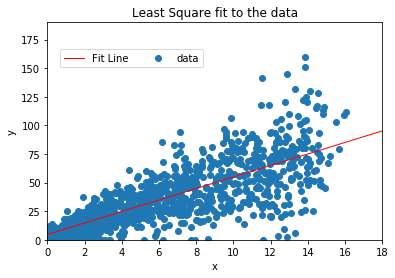

In [307]:
X = range(20)
YFit = [m*x+b for x in X]
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(dataX, dataY,label='data')
ax.plot(X, YFit, color='red', label='Fit Line',linewidth=1.0)##New: fit line
plt.title('Least Square fit to the data')
plt.xlabel('x')
plt.ylabel('y')
axes = plt.gca()
axes.set_xlim([0,18])
axes.set_ylim([0,190])
ax.legend(loc='upper center', bbox_to_anchor=(0.25, 0.9), shadow=False, ncol=2)
fig.patch.set_facecolor('white')
plt.show()

Lets check the how well the model explains the data, i.e sum of square of residuals, MSE and R^2. R^2 gives a measure of the goodness of the fit and should be ideally close to 1.

In [308]:
# sum of square of residuals
SS_residuals = sum( [pow(y - (m*x+b),2) for x,y in zip(dataX,dataY) ] )

# mean squared deviation in y
msd_y = sum([pow(y-ybar,2) for y in dataY])

#R^2
R_squared = 1.0 - (SS_residuals/msd_y)
print('R^2:', round(R_squared, 4)) 

# mean squared error
mse = SS_residuals / (n-2)

# mean squared deviation in x
msd_x = sum([ pow(x-xbar,2) for x in dataX])

# standard error
Y_SE = [np.sqrt( mse * ( 1./n + pow(x-xbar,2)/msd_x ) ) for x in dataX]

print ('mse:', round(mse,3))
#print('Y_Fit:', YFit[0:3])
#print('Y_SE:', Y_SE[0:3])


R^2: 0.5783
mse: 320.392


This is pretty mediocer, as expected from a noisy system as this one. Lets plot it for all or few points.

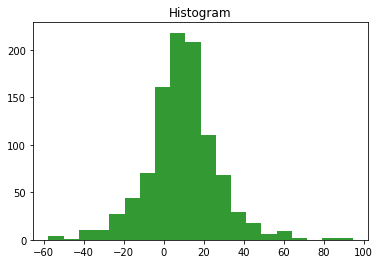

In [309]:
def hplot(data, nbins, label=''):
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.hist(data,nbins,color='green',alpha=0.8)
        plt.title('Histogram')
        plt.xlabel(label)
        fig.patch.set_facecolor('white') #sets the color of the border
plt.show()

residuals = [y - m*x+b for x,y in zip(dataX,dataY) if x < 100]
hplot(residuals,20)

Lets also project the data along the fit line by finding the perpendicular distances from the points and the fit line and then making a histogram of those.

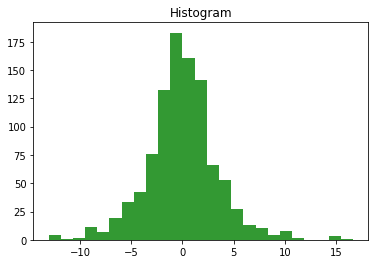

In [310]:
perp_dist = [ (y - (m*x+b))/math.sqrt(1.0+m*m) for x,y in zip(dataX,dataY) ]
hplot(perp_dist,25)

Using student's t-distribution single tail, for n-2 dof, lets construct the upper and lower CI (95%)

In [311]:
ndof = n - 2
t_crit = stats.t.ppf(1-0.05, ndof)

y_ci_low = [yi-t_crit*yvar for yi, yvar in zip(YFit, Y_SE)]
y_ci_hi = [yi+t_crit*yvar for yi, yvar in zip(YFit, Y_SE)]

print (len(y_ci_low)); print(len(y_ci_hi)); print(len(YFit))

20
20
20


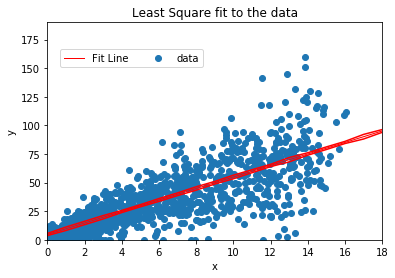

In [312]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(dataX, dataY,label='data')
X = range(len(y_ci_low))
YFit = [m*x+b for x in X]
ax.plot(X, YFit, color='red', label='Fit Line',linewidth=1.0)##New: fit line
ax.plot(X, y_ci_low,'r')
ax.plot(X, y_ci_hi,'r')
plt.title('Least Square fit to the data')
plt.xlabel('x')
plt.ylabel('y')
axes = plt.gca()
axes.set_xlim([0,18])
axes.set_ylim([0,190])
ax.legend(loc='upper center', bbox_to_anchor=(0.25, 0.9), shadow=False, ncol=2)
fig.patch.set_facecolor('white')
plt.show()